**Exploring the Interplay Between Malaria and Economic Growth**
<br>
**Project 2:** Effect of Malaria Control Interventions on Economic Recovery
<br>
**Research Question:** How do different malaria control interventions (e.g., bed nets, insecticides) influence both
malaria transmission and economic recovery?


In [7]:
import numpy as np
import sympy as sm

import scipy as sp
from debugpy.common.util import hide_debugpy_internals
from scipy.integrate import solve_ivp

import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
sm.init_printing()

In [8]:
# Standard ODEs
def dydt(t, y, par) -> np.array:
    # Inputted infectious humans, vectors
    Ih = y[0]
    Iv = y[1]

    """
    Inputted parameters
    Parameter list follows format:
    [Human force of infection, vector force of infection, human population, human recovery rate, natural death rate]
    """
    lambdaH = par[0]
    lambdaV = par[1]
    Nh = par[2]
    gamma = par[3]
    mu = par[4]

    dIh = lambdaH*Iv/Nh*(Nh - Ih) - gamma*Ih
    dIv = lambdaV*Ih/Nh*(Nv - Iv) - mu*Iv

    return np.array([dIh, dIv])

def solveModel(par,tspan,init_cond,t_eval):
    ode_soln = solve_ivp(dydt,
                         tspan,
                         init_cond,
                         t_eval = t_eval,
                         args = (par,))
    return ode_soln

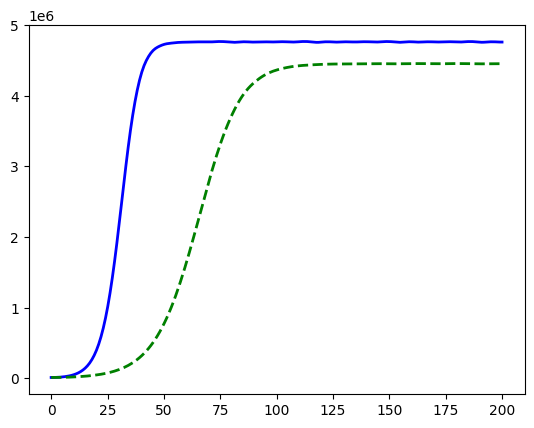

Text(0, 0.5, 'Infected Population')

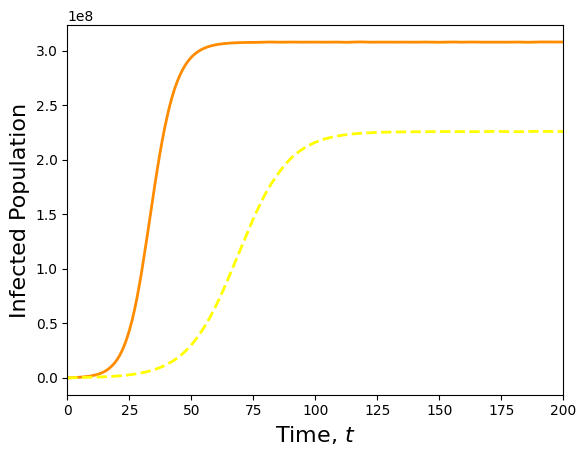

In [45]:
"""
Are we operating under these same values, or finding specifics for selected country/region?
"""

# Parameter values
a0 = 1/4 # between 1/4 - 1/3
u = .50 # Population implementing intervention *PLACEHOLDER VALUES*
epsilon = .90 # Intervention efficacy
aM = a0 * (1-u*epsilon) # Modified biting rate

b = 22/1000 # Transmission probability: infectious mosquito -> susceptible human
c = 48/100 # infectious human -> susceptible mosquito
lambdaH = a0*b
lambdaV = a0*c
lambdaHM = aM*b
lambdaVM = aM*c
gamma = 1/60 # Human recovery rate
mu = 1/14 # Natural death rate of mosquito (days)
Nh = 5000000
Nv = 100*Nh # could be 10-100
Ih0 = 10000
Iv0 = 20000

# Standard calculations
par = np.array([lambdaH,lambdaV,Nh,gamma,mu])
init_cond = np.array([Ih0,Iv0])
tspan = (0,200)
t_eval = np.linspace(tspan[0], tspan[-1], 200)

soln = solveModel(par,tspan,init_cond,t_eval)
t = soln.t
Ih = soln.y[0]
Iv = soln.y[1]

# Intervention calculations
parI = np.array([lambdaHM,lambdaVM,Nh,gamma,mu])
solI = solveModel(parI,tspan,init_cond,t_eval)
tI = solI.t
IhI = solI.y[0]
IvI = solI.y[1]


# Plotting model
plt.plot(t, Ih, c='blue',  linewidth=2,)
plt.plot(tI, IhI, c='green',  linewidth=2, linestyle='--')
plt.show()
plt.plot(t, Iv, c='darkorange',  linewidth=2,)
plt.plot(tI, IvI, c='yellow',  linewidth=2, linestyle='--')
#plt.legend(['Iₕ','Iᵥ', 'Iₕ (w/ LLINs)', 'Iᵥ (w/ LLINs)'],fontsize=16)

xmin = t[0]
xmax = t[-1]
plt.xlim(xmin, xmax)

xmin = t[0]
xmax = t[-1]
plt.xlim(xmin, xmax)

plt.xlabel("Time, $t$", fontsize=16)
plt.ylabel("Infected Population",fontsize=16)